In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import torch

In [ ]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
x=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('X training data size: {}'.format(x_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(x_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(x_test)/len(df.index)) * 100))

X training data size: (209, 12)
y training data size: (209,)
X testing data size: (90, 12)
y testing data size: (90,)
69.90% of data is in training set
30.10% of data is in test set


Classification accuracy: 0.8889


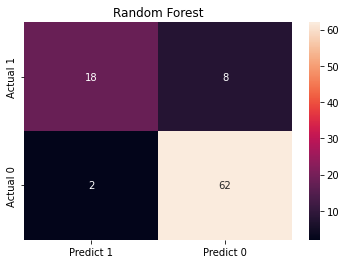

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)
#confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Random Forest')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.8444


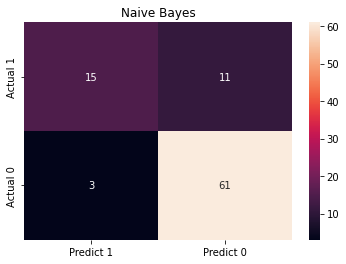

In [ ]:
from sklearn.naive_bayes import GaussianNB
rf1=GaussianNB()
rf1.fit(x_train,y_train)
gnb_pred = rf1.predict(x_test)
rf1.score(x_test,y_test)

cm=metrics.confusion_matrix(y_test, gnb_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Naive Bayes')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.6111


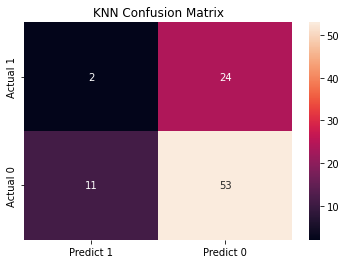

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn.score(x_test,y_test)
0.8648238665093545
#confusion matrix for KNN
cm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('KNN Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification accuracy: 0.8111


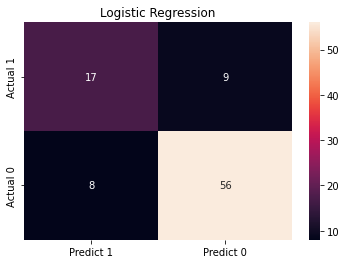

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr.score(x_test,y_test)

cm=metrics.confusion_matrix(y_test, lr_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Logistic Regression')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.8556


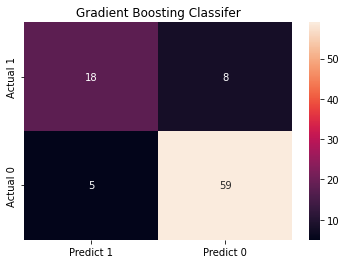

In [ ]:
from sklearn import ensemble
gb=ensemble.GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb.score(x_test,y_test)

#confusion matrix for Gradient Boosting Classifer
cm=metrics.confusion_matrix(y_test, gb_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Gradient Boosting Classifer')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.7667


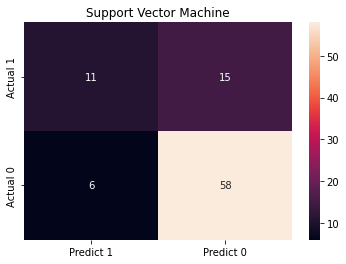

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',probability=True)
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
sv.score(x_test,y_test)

#confusion matrix for Support Vector Machine
cm=metrics.confusion_matrix(y_test, sv_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Support Vector Machine')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

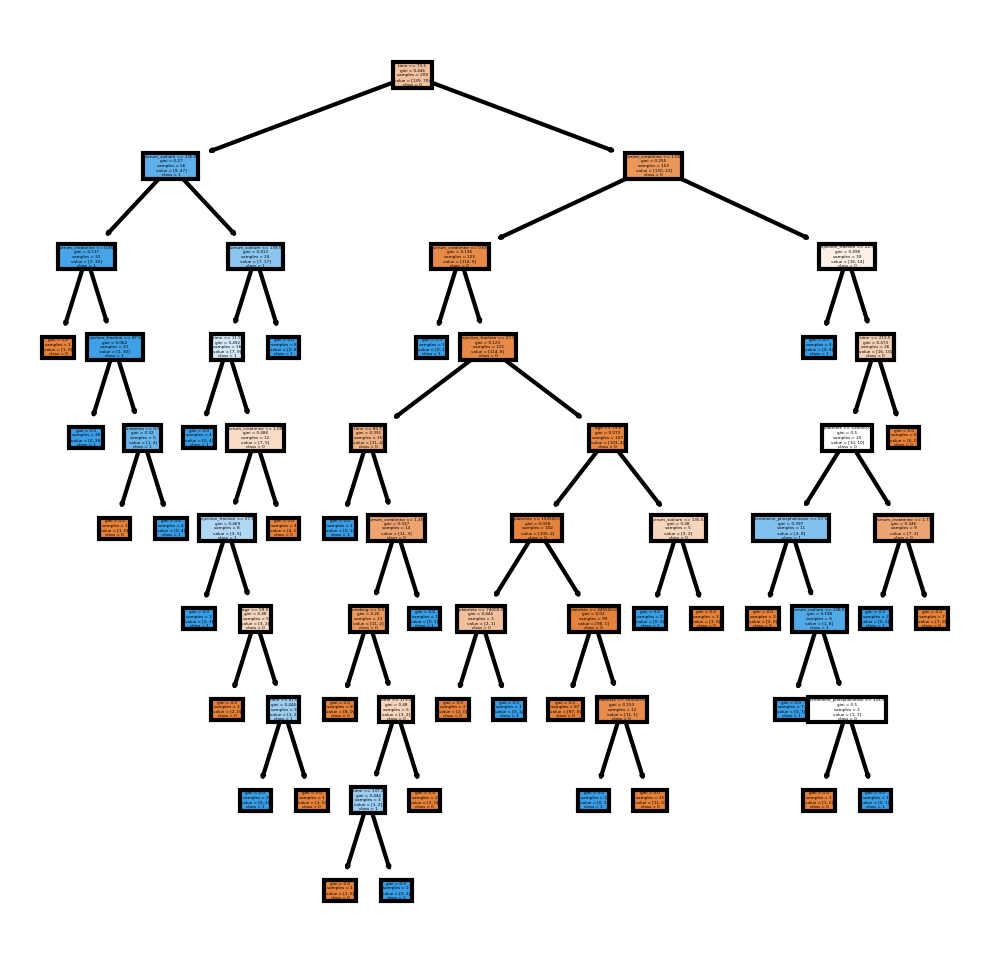

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
dy_pred=dt.predict(x_test)
dt.score(x_test,y_test)

#Decision Tree Plot
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fn = list(x_train)
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt, feature_names = fn, class_names=cn, filled=True)
fig.savefig('tree.png')

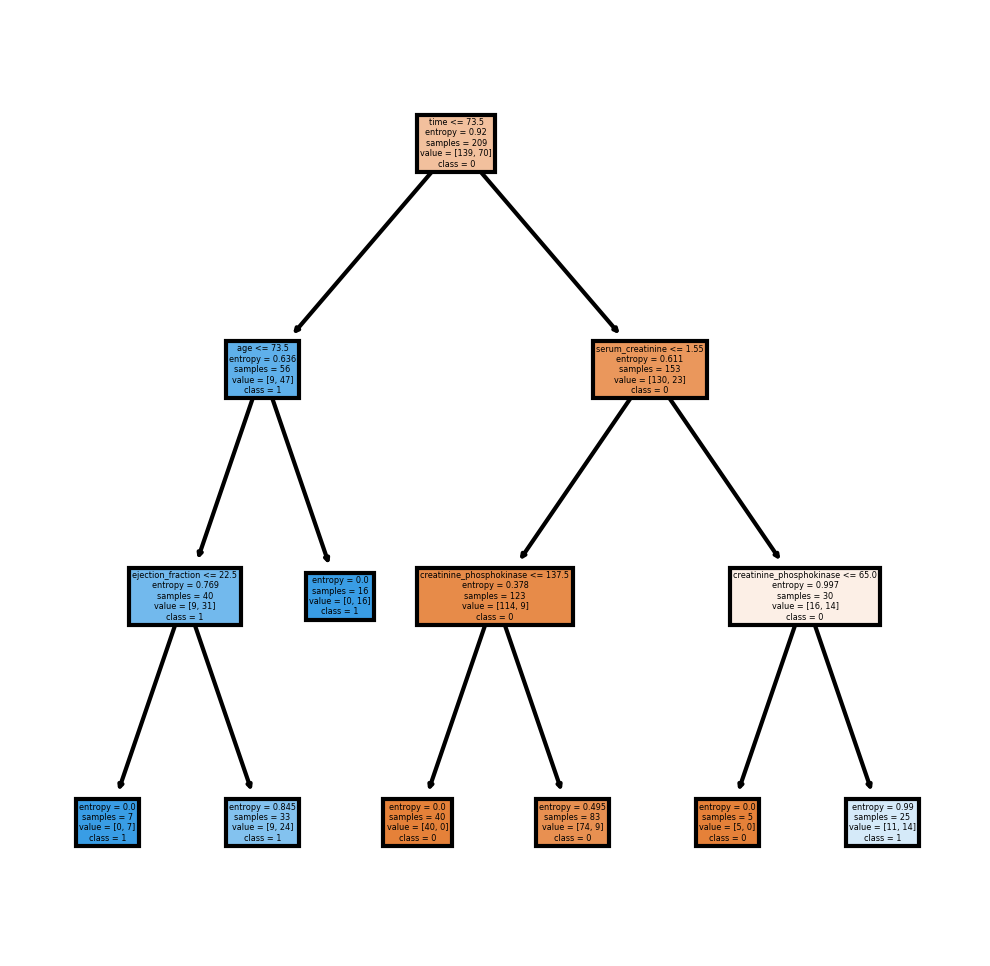

In [ ]:
from sklearn import tree
dt1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt1.fit(x_train,y_train)
dy_pred1=dt.predict(x_test)
dt1.score(x_test,y_test)

#Decision Tree Plot
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fn = list(x_train)
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt1, feature_names = fn, class_names=cn, filled=True)
fig.savefig('tree.png')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
model = BaggingClassifier(base_estimator = dt,n_estimators = 500)
results = model_selection.cross_val_score(model, x, y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.7128282828282829


Accuracy: 0.8222222222222222
Classification accuracy: 0.8222


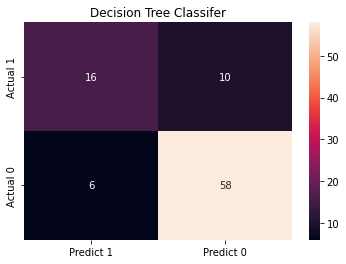

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
ay_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, ay_pred))

#confusion matrix for Decision Tree Classifier for entropy
cm=metrics.confusion_matrix(y_test, ay_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Decision Tree Classifer')
sns.heatmap(df_cm, annot=True, fmt='g');


TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

In [ ]:
print(classification_report(y_test,ay_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.73      0.62      0.67        26

    accuracy                           0.82        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



In [ ]:
df1 = pd.DataFrame({'All Classifier': ['Random Forest', 'Naive Bayes', 'K_Nearest Classifier', 'Logistic Regression',
'Gradient Boosting','Support Vector Machine', 'Decision Tree gini','Decision Tree Entropy','Bagging Clasifier','Ada Boosting'], 'Accuracy': ['0.8785', '0.8000',
'0.8643', '0.8784', '0.8824', '0.8800','0.8284','0.8698','0.8774','0.8712']})

In [ ]:
df1

,All Classifier,Accuracy
0,Random Forest,0.8785
1,Naive Bayes,0.8000
2,K_Nearest Classifier,0.8643
3,Logistic Regression,0.8784
4,Gradient Boosting,0.8824
5,Support Vector Machine,0.8800
6,Decision Tree gini,0.8284
7,Decision Tree Entropy,0.8698
8,Bagging Clasifier,0.8774
9,Ada Boosting,0.8712


In [ ]:
r_probs=[0 for _ in range(len(y_test))]
rf_probs=rf.predict_proba(x_test)
rf1_probs=rf1.predict_proba(x_test)
knn_probs=knn.predict_proba(x_test)
lr_probs=lr.predict_proba(x_test)
gb_probs=gb.predict_proba(x_test)
sv_probs=sv.predict_proba(x_test)
dt_probs=dt.predict_proba(x_test)
dt1_probs=dt1.predict_proba(x_test)
model_probs=model.predict_proba(x_test)
abc_probs=abc.predict_proba(x_test)

In [ ]:
rf_probs=rf_probs[:,1]
rf1_probs=rf1_probs[:,1]
knn_probs=knn_probs[:,1]
lr_probs=lr_probs[:,1]
gb_probs=gb_probs[:,1]
sv_probs=sv_probs[:,1]
dt_probs=dt_probs[:,1]
dt1_probs=dt1_probs[:,1]
model_probs=model_probs[:,1]
abc_probs=abc_probs[:,1]

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
r_auc=roc_auc_score(y_test,r_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
rf1_auc=roc_auc_score(y_test,rf1_probs)
knn_auc=roc_auc_score(y_test,knn_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
gb_auc=roc_auc_score(y_test,gb_probs)
sv_auc=roc_auc_score(y_test,sv_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
dt1_auc=roc_auc_score(y_test,dt1_probs)
model_auc=roc_auc_score(y_test,model_probs)
abc_auc=roc_auc_score(y_test,abc_probs)

In [ ]:
print("Random Predictions:AUROC = %.3f"%(r_auc))
print("Random Forest:AUROC = %.3f"%(rf_auc))
print("Naive Bayes:AUROC = %.3f"%(rf1_auc))
print("K-Nearest Neighbours:AUROC = %.3f"%(knn_auc))
print("Logistic Regression:AUROC = %.3f"%(lr_auc))
print("Gradient Boosting:AUROC = %.3f"%(gb_auc))
print("Support Vector Machine:AUROC = %.3f"%(sv_auc))
print("Decesion Tree Gini:AUROC = %.3f"%(dt_auc))
print("Decesion Tree Entropy:AUROC = %.3f"%(dt1_auc))
print("Bagging Clasifier:AUROC = %.3f"%(model_auc))
print("Ada Boosting:AUROC = %.3f"%(abc_auc))

Random Predictions:AUROC = 0.500
Random Forest:AUROC = 0.904
Naive Bayes:AUROC = 0.875
K-Nearest Neighbours:AUROC = 0.391
Logistic Regression:AUROC = 0.834
Gradient Boosting:AUROC = 0.916
Support Vector Machine:AUROC = 0.737
Decesion Tree Gini:AUROC = 0.772
Decesion Tree Entropy:AUROC = 0.847
Bagging Clasifier:AUROC = 0.874
Ada Boosting:AUROC = 0.874


In [ ]:
r_fpr,r_tpr,_=roc_curve(y_test,r_probs)
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_probs)
rf1_fpr,rf1_tpr,_=roc_curve(y_test,rf1_probs)
knn_fpr,knn_tpr,_=roc_curve(y_test,knn_probs)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs)
gb_fpr,gb_tpr,_=roc_curve(y_test,gb_probs)
sv_fpr,sv_tpr,_=roc_curve(y_test,sv_probs)
dt_fpr,dt_tpr,_=roc_curve(y_test,dt_probs)
dt1_fpr,dt1_tpr,_=roc_curve(y_test,dt1_probs)
model_fpr,model_tpr,_=roc_curve(y_test,model_probs)
abc_fpr,abc_tpr,_=roc_curve(y_test,abc_probs)

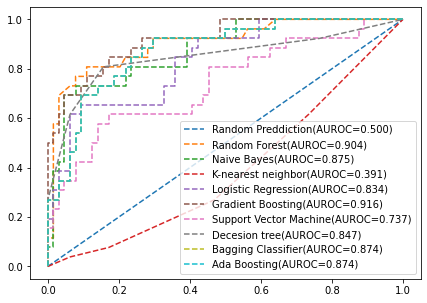

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(r_fpr,r_tpr,linestyle='--', label="Random Preddiction(AUROC=%0.3f)"%r_auc)
plt.plot(rf_fpr,rf_tpr,linestyle='--', label="Random Forest(AUROC=%0.3f)"%rf_auc)
plt.plot(rf1_fpr,rf1_tpr,linestyle='--', label="Naive Bayes(AUROC=%0.3f)"%rf1_auc)
plt.plot(knn_fpr,knn_tpr,linestyle='--', label="K-nearest neighbor(AUROC=%0.3f)"%knn_auc)
plt.plot(lr_fpr,lr_tpr,linestyle='--', label="Logistic Regression(AUROC=%0.3f)"%lr_auc)
plt.plot(gb_fpr,gb_tpr,linestyle='--', label="Gradient Boosting(AUROC=%0.3f)"%gb_auc)
plt.plot(sv_fpr,sv_tpr,linestyle='--', label="Support Vector Machine(AUROC=%0.3f)"%sv_auc)
plt.plot(dt1_fpr,dt1_tpr,linestyle='--', label="Decesion tree(AUROC=%0.3f)"%dt1_auc)
plt.plot(model_fpr,model_tpr,linestyle='--', label="Bagging Classifier(AUROC=%0.3f)"%model_auc)
plt.plot(abc_fpr,abc_tpr,linestyle='--', label="Ada Boosting(AUROC=%0.3f)"%abc_auc)
plt.legend()